**House Price Prediction with ANN**

#**The aim of this project is to predict House prices.**
The dataset used in this project was gotten from kaggle datasets. It is a publicly available dataset.
This project focuses on developing an artificial neural network to predict the price of houses.  

In [125]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [126]:
#importing the file
#this project was carried out in google collaboratory environment
#so i imported my drive, since the file is in my google drive
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/Housing.csv'

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [127]:
#descriptive statistics of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


In [128]:
#checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The dataset does not contain any missing data

In [129]:
#checking for the unique values present in the categorical columns
for c in df.columns:
  if df[c].dtype == 'object':
    print(f'{c} : {df[c].unique()}')

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [130]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

**Exploratory Analysis**

<Axes: xlabel='price', ylabel='Density'>

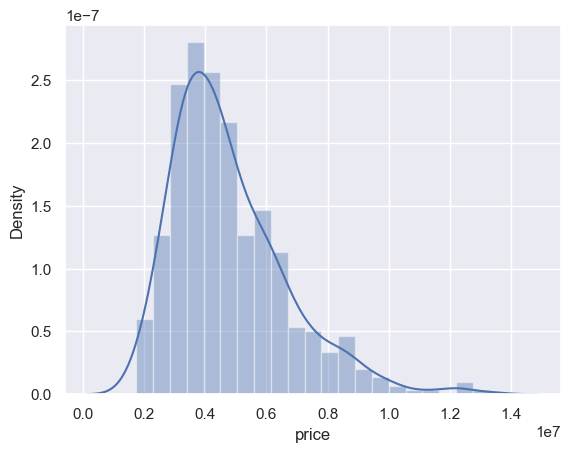

In [131]:
#checking the price distribution
sns.distplot(df['price'])

In [132]:
df.price.describe()

count        545.000
mean     4766729.248
std      1870439.616
min      1750000.000
25%      3430000.000
50%      4340000.000
75%      5740000.000
max     13300000.000
Name: price, dtype: float64

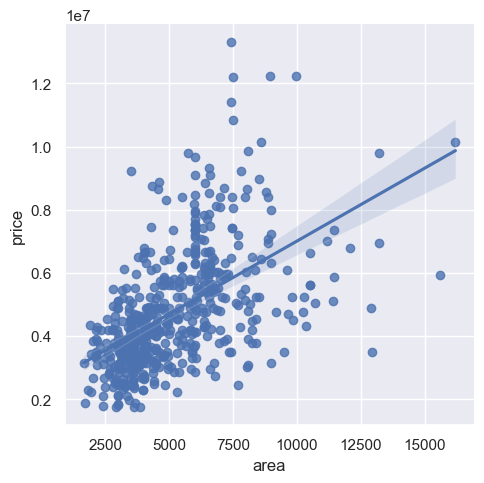

In [133]:
#scatter plot to display the relationship between price and area
sns.lmplot(x='area', y='price', data=df)

<Axes: ylabel='bedrooms'>

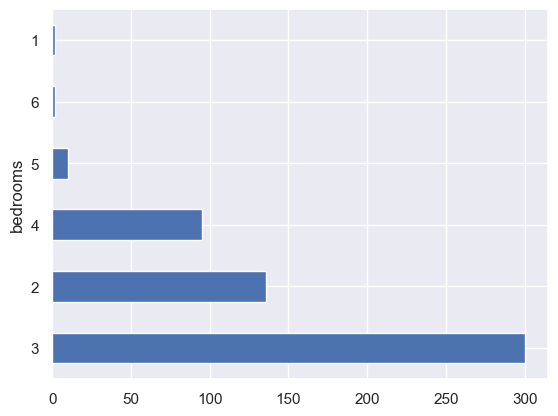

In [134]:
#displaying the number of bathrooms per house
df.bedrooms.value_counts().plot.barh()

<Axes: ylabel='stories'>

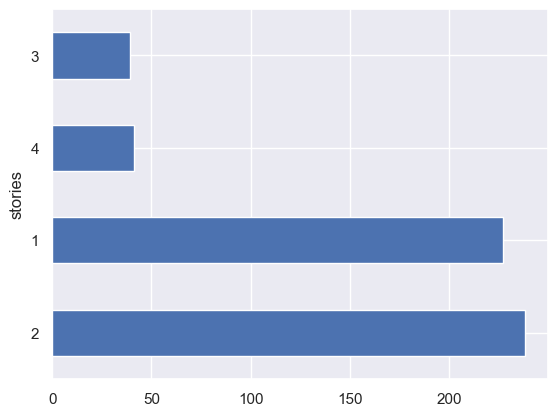

In [135]:
#displaying the number of story building per house
df.stories.value_counts().plot.barh()

<Axes: ylabel='bathrooms'>

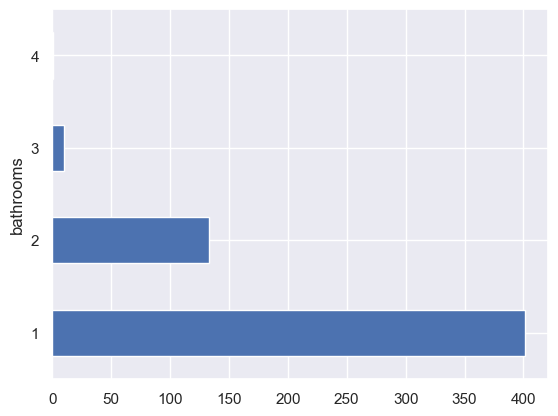

In [136]:
#displaying the number of bathrooms per house
df.bathrooms.value_counts().plot.barh()

**Feature Enginnering and Encoding**

In [137]:
df['area_per_bathroom'] = df['area']/df['bathrooms']
df['area_per_bedrooms'] = df['area']/df['bedrooms']
df['area_per_stories'] = df['area']/df['stories']
df['bathrooms_per_bedrooms'] = df['bathrooms']/df['bedrooms']
df['stories_per_bedrooms'] = df['stories']/df['bedrooms']
df['area_times_bedrooms'] = df['area']*df['bedrooms']
df['bathroom_times_stories'] = df['bathrooms']*df['stories']
df['area_times_stories'] = df['area']*df['stories']


In [138]:
#since a number of categorical columns have Yes and No values, I have decided to assign 1 to 'yes' and 0 to 'no'
df.replace({
    'yes': 1,
    'no': 0
},inplace = True)

In [139]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories
0,13300000,7420,4,2,3,1,0,0,0,1,...,1,furnished,3710.000,1855.000,2473.333,0.500,0.750,29680,6,22260
1,12250000,8960,4,4,4,1,0,0,0,1,...,0,furnished,2240.000,2240.000,2240.000,1.000,1.000,35840,16,35840
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,semi-furnished,4980.000,3320.000,4980.000,0.667,0.667,29880,4,19920
3,12215000,7500,4,2,2,1,0,1,0,1,...,1,furnished,3750.000,1875.000,3750.000,0.500,0.500,30000,4,15000
4,11410000,7420,4,1,2,1,1,1,0,1,...,0,furnished,7420.000,1855.000,3710.000,0.250,0.500,29680,2,14840


In [140]:
from sklearn.preprocessing import OneHotEncoder


In [141]:
cat_val = []
#creating a list for categorical columns
for c in df.columns:
    if df[c].dtype == 'object':
        cat_val.append(c)

In [142]:
cat_val

['furnishingstatus']

In [143]:
#encoding the categorical feature
ohe = OneHotEncoder(drop = 'first',
                    sparse = False).set_output(transform = 'pandas')
ohe_transformed = ohe.fit_transform(df[cat_val])
df = pd.concat([df, ohe_transformed], axis = 1)
df.drop(cat_val, axis = 1, inplace = True)

In [144]:
import pickle
pickle.dump(ohe, open('encoder.pkl','wb'))

In [145]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,...,3710.000,1855.000,2473.333,0.500,0.750,29680,6,22260,0.000,0.000
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.000,2240.000,2240.000,1.000,1.000,35840,16,35840,0.000,0.000
2,12250000,9960,3,2,2,1,0,1,0,0,...,4980.000,3320.000,4980.000,0.667,0.667,29880,4,19920,1.000,0.000
3,12215000,7500,4,2,2,1,0,1,0,1,...,3750.000,1875.000,3750.000,0.500,0.500,30000,4,15000,0.000,0.000
4,11410000,7420,4,1,2,1,1,1,0,1,...,7420.000,1855.000,3710.000,0.250,0.500,29680,2,14840,0.000,0.000


In [146]:
df1 = df.copy()

In [147]:
#the house price values are large and this confuses the algorithm, so i decided to take the logarithmic value of the house price
df1['log_price'] = np.log(df1['price'])

#standardizing the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df1.drop(['log_price', 'price'], axis = 1)
y = df1['log_price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.047,1.403,1.422,1.378,0.406,-0.465,-0.735,-0.219,1.473,1.518,...,-0.307,0.042,-0.454,0.337,0.521,1.704,1.834,1.908,-0.845,-0.696
1,1.757,1.403,5.406,2.532,0.406,-0.465,-0.735,-0.219,1.473,2.679,...,-1.000,0.501,-0.558,3.474,1.473,2.445,7.021,3.932,-0.845,-0.696
2,2.218,0.047,1.422,0.224,0.406,-0.465,1.361,-0.219,-0.679,1.518,...,0.292,1.789,0.663,1.383,0.203,1.728,0.797,1.559,1.184,-0.696
3,1.084,1.403,1.422,0.224,0.406,-0.465,1.361,-0.219,1.473,2.679,...,-0.288,0.066,0.115,0.337,-0.432,1.743,0.797,0.826,-0.845,-0.696
4,1.047,1.403,-0.570,0.224,0.406,2.149,1.361,-0.219,1.473,1.518,...,1.443,0.042,0.098,-1.232,-0.432,1.704,-0.241,0.802,-0.845,-0.696


In [148]:
pickle.dump(scaler,open('scal.pkl','wb'))

In [149]:
#splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape


((436, 21), (109, 21))

In [150]:
x_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.047,1.403,1.422,1.378,0.406,-0.465,-0.735,-0.219,1.473,1.518,...,-0.307,0.042,-0.454,0.337,0.521,1.704,1.834,1.908,-0.845,-0.696
1,1.757,1.403,5.406,2.532,0.406,-0.465,-0.735,-0.219,1.473,2.679,...,-1.000,0.501,-0.558,3.474,1.473,2.445,7.021,3.932,-0.845,-0.696
2,2.218,0.047,1.422,0.224,0.406,-0.465,1.361,-0.219,-0.679,1.518,...,0.292,1.789,0.663,1.383,0.203,1.728,0.797,1.559,1.184,-0.696
3,1.084,1.403,1.422,0.224,0.406,-0.465,1.361,-0.219,1.473,2.679,...,-0.288,0.066,0.115,0.337,-0.432,1.743,0.797,0.826,-0.845,-0.696
4,1.047,1.403,-0.570,0.224,0.406,2.149,1.361,-0.219,1.473,1.518,...,1.443,0.042,0.098,-1.232,-0.432,1.704,-0.241,0.802,-0.845,-0.696


#### Model Architecture
This is the artificial neural network structure. In this network, there are 4 hidden layers and each hidden layer has its own activation function.
The first hidden layer uses RELU as activation fumction, the second uses TANH, the third too and the last hidden layer makes use of RELU activation function.
The output layer does not need an activation function. The optimizer used is ADAM and loss function is Mean_squared error.

#### Model Training

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential(
    [
        Flatten(input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='tanh'),
        Dense(8, activation = 'relu'),
        #Dropout(0.2),
        Dense(4, activation = 'relu'),
        #Dropout(0.2),
        #Dense(2, activation = 'tanh'),
        Dense(1),

    ]
)

model.compile(optimizer='adam', loss='mean_squared_error')
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

#fitting the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
14/14 [==============================] - 2s 3ms/step - loss: 234.0098
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 230.6266
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 223.3641
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 214.9707
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 206.6728
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 198.6240
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 190.3386
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 181.6227
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 172.3606
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 162.5446
Epoch 11/50
14/14 [==============================] - 0s 3ms/step - loss: 152.2048
Epoch 12/50
14/14 [==============================] - 0s 3ms/step - loss: 141.2265
Epoch 13/50
14/14 [======

In [152]:
#evaluating the model on the test sets
model.evaluate(X_test, y_test)
#print(f'Test loss: {loss:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.1938


0.19379402697086334

In [153]:
#making predictions on the test data
y_preds = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [154]:
#comparing the test results and the predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds.flatten()})
results['Difference'] = results['Actual'] - results['Predicted']
results.head(20)

,Actual,Predicted,Difference
316,15.217,15.292,-0.076
77,15.710,15.303,0.408
360,15.127,15.303,-0.176
90,15.678,15.302,0.376
493,14.845,15.302,-0.457
209,15.405,15.302,0.103
176,15.474,15.303,0.170
249,15.329,15.302,0.027
516,14.712,15.303,-0.591
426,15.025,15.303,-0.278


In [155]:
#taking the exponential value of the predictions and actual prices and comparing them
results['actual_price'] = np.exp(results['Actual'])
results['predicted_price'] = np.exp(results['Predicted'])
results['actual_difference'] = np.exp(results['Difference'])
results.head()
#pd.options.display.float_format = '{:.0f}'.format
results.head(20)

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
316,15.217,15.292,-0.076,4060000.000,4378502.000,0.927
77,15.710,15.303,0.408,6650000.000,4424283.500,1.503
360,15.127,15.303,-0.176,3710000.000,4425339.000,0.838
90,15.678,15.302,0.376,6440000.000,4420028.500,1.457
493,14.845,15.302,-0.457,2800000.000,4423022.500,0.633
209,15.405,15.302,0.103,4900000.000,4421808.000,1.108
176,15.474,15.303,0.170,5250000.000,4427673.000,1.186
249,15.329,15.302,0.027,4543000.000,4421314.500,1.028
516,14.712,15.303,-0.591,2450000.000,4426111.500,0.554
426,15.025,15.303,-0.278,3353000.000,4426736.000,0.757


In [156]:
pickle.dump(model, open('model.pkl','wb'))

In [157]:
df.parking.value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [158]:
results

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
316,15.217,15.292,-0.076,4060000.000,4378502.000,0.927
77,15.710,15.303,0.408,6650000.000,4424283.500,1.503
360,15.127,15.303,-0.176,3710000.000,4425339.000,0.838
90,15.678,15.302,0.376,6440000.000,4420028.500,1.457
493,14.845,15.302,-0.457,2800000.000,4423022.500,0.633
...,...,...,...,...,...,...
15,16.024,15.302,0.721,9100000.000,4422929.500,2.057
357,15.143,15.300,-0.157,3773000.000,4413546.500,0.855
39,15.884,15.303,0.580,7910000.000,4427715.500,1.786
54,15.810,15.302,0.509,7350000.000,4419674.500,1.663


In [159]:
results.tail(20)

,Actual,Predicted,Difference,actual_price,predicted_price,actual_difference
11,16.086,15.303,0.783,9681000.000,4426436.000,2.187
271,15.283,15.304,-0.020,4340000.000,4428707.500,0.980
22,15.972,15.303,0.669,8645000.000,4426807.500,1.953
365,15.125,15.302,-0.178,3703000.000,4422297.000,0.837
182,15.454,15.303,0.151,5145000.000,4425389.500,1.163
89,15.678,15.303,0.375,6440000.000,4427420.000,1.455
117,15.599,15.303,0.296,5950000.000,4426647.500,1.344
131,15.575,15.303,0.272,5810000.000,4427437.000,1.312
140,15.563,15.303,0.260,5740000.000,4426495.500,1.297
101,15.645,15.302,0.343,6230000.000,4422917.000,1.409


In [160]:
np.exp(15.4)

4876800.853272269

In [161]:
np.exp(14.5456)

2075266.215408412

In [162]:
0*0

0

In [163]:
pd.options.display.float_format = '{:.3f}'.format

In [164]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,log_price
0,13300000,7420,4,2,3,1,0,0,0,1,...,1855.000,2473.333,0.500,0.750,29680,6,22260,0.000,0.000,16.403
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.000,2240.000,1.000,1.000,35840,16,35840,0.000,0.000,16.321
2,12250000,9960,3,2,2,1,0,1,0,0,...,3320.000,4980.000,0.667,0.667,29880,4,19920,1.000,0.000,16.321
3,12215000,7500,4,2,2,1,0,1,0,1,...,1875.000,3750.000,0.500,0.500,30000,4,15000,0.000,0.000,16.318
4,11410000,7420,4,1,2,1,1,1,0,1,...,1855.000,3710.000,0.250,0.500,29680,2,14840,0.000,0.000,16.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,...,1500.000,3000.000,0.500,0.500,6000,1,3000,0.000,1.000,14.414
541,1767150,2400,3,1,1,0,0,0,0,0,...,800.000,2400.000,0.333,0.333,7200,1,2400,1.000,0.000,14.385
542,1750000,3620,2,1,1,1,0,0,0,0,...,1810.000,3620.000,0.500,0.500,7240,1,3620,0.000,1.000,14.375
543,1750000,2910,3,1,1,0,0,0,0,0,...,970.000,2910.000,0.333,0.333,8730,1,2910,0.000,0.000,14.375


In [165]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,...,3710.000,1855.000,2473.333,0.500,0.750,29680,6,22260,0.000,0.000
1,12250000,8960,4,4,4,1,0,0,0,1,...,2240.000,2240.000,2240.000,1.000,1.000,35840,16,35840,0.000,0.000
2,12250000,9960,3,2,2,1,0,1,0,0,...,4980.000,3320.000,4980.000,0.667,0.667,29880,4,19920,1.000,0.000
3,12215000,7500,4,2,2,1,0,1,0,1,...,3750.000,1875.000,3750.000,0.500,0.500,30000,4,15000,0.000,0.000
4,11410000,7420,4,1,2,1,1,1,0,1,...,7420.000,1855.000,3710.000,0.250,0.500,29680,2,14840,0.000,0.000


In [166]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'area_per_bathroom', 'area_per_bedrooms',
       'area_per_stories', 'bathrooms_per_bedrooms', 'stories_per_bedrooms',
       'area_times_bedrooms', 'bathroom_times_stories', 'area_times_stories',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [167]:
pred_data = pd.DataFrame({
    'area':[12333],
    'bedrooms':[4],
    'bathrooms':[2],
    'stories':[1],
    'mainroad':['yes'],
    'guestroom':['no'],
    'basement':['no'],
    'hotwaterheating':['yes'],
    'airconditioning':['no'],
    'parking':[0],
    'prefarea':['yes'],
    'furnishingstatus':['unfurnished']
})

In [168]:
pred_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12333,4,2,1,yes,no,no,yes,no,0,yes,unfurnished


In [169]:
pred_data.replace({
    'yes':1,
    'no':0
},inplace = True)

In [170]:
pred_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12333,4,2,1,1,0,0,1,0,0,1,unfurnished


In [171]:
pred_prep = pred_data.copy()

In [172]:
scaler = pickle.load(open('scal.pkl','rb'))
encoder = pickle.load(open('encoder.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [173]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              1 non-null      int64 
 1   bedrooms          1 non-null      int64 
 2   bathrooms         1 non-null      int64 
 3   stories           1 non-null      int64 
 4   mainroad          1 non-null      int64 
 5   guestroom         1 non-null      int64 
 6   basement          1 non-null      int64 
 7   hotwaterheating   1 non-null      int64 
 8   airconditioning   1 non-null      int64 
 9   parking           1 non-null      int64 
 10  prefarea          1 non-null      int64 
 11  furnishingstatus  1 non-null      object
dtypes: int64(11), object(1)
memory usage: 228.0+ bytes


In [174]:
pred_prep.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [175]:
cat_col = []
for c in pred_prep.columns:
    if pred_prep[c].dtype == 'object':
        cat_col.append(c)

In [176]:
cat_col

['furnishingstatus']

In [177]:
pred_prep['area_per_bathroom'] = pred_prep['area']/pred_prep['bathrooms']
pred_prep['area_per_bedrooms'] = pred_prep['area']/pred_prep['bedrooms']
pred_prep['area_per_stories'] = pred_prep['area']/pred_prep['stories']
pred_prep['bathrooms_per_bedrooms'] = pred_prep['bathrooms']/pred_prep['bedrooms']
pred_prep['stories_per_bedrooms'] = pred_prep['stories']/pred_prep['bedrooms']
pred_prep['area_times_bedrooms'] = pred_prep['area']*pred_prep['bedrooms']
pred_prep['bathroom_times_stories'] = pred_prep['bathrooms']*pred_prep['stories']
pred_prep['area_times_stories'] = pred_prep['area']*pred_prep['stories']

In [178]:
enc_data =pd.DataFrame(encoder.transform(pred_prep[cat_col]))#.toarray())
    #enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names_out(cat_col)
pred_prep = pred_prep.join(enc_data)
pred_prep

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,12333,4,2,1,1,0,0,1,0,0,...,6166.500,3083.250,12333.000,0.500,0.250,49332,2,12333,0.000,1.000


In [179]:
pred_prep.drop(['furnishingstatus'],
    axis=1,
    inplace = True)

In [180]:
pred_prep

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,12333,4,2,1,1,0,0,1,0,0,...,6166.500,3083.250,12333.000,0.500,0.250,49332,2,12333,0.000,1.000


In [181]:
pred_prep

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,12333,4,2,1,1,0,0,1,0,0,...,6166.500,3083.250,12333.000,0.500,0.250,49332,2,12333,0.000,1.000


In [182]:
scaled_data = scaler.transform(pred_prep)
scaled_data = pd.DataFrame(scaled_data, columns = pred_prep.columns)
scaled_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,area_per_bathroom,area_per_bedrooms,area_per_stories,bathrooms_per_bedrooms,stories_per_bedrooms,area_times_bedrooms,bathroom_times_stories,area_times_stories,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3.313,1.403,1.422,-0.929,0.406,-0.465,-0.735,4.561,-0.679,-0.806,...,0.851,1.507,3.940,0.337,-1.384,4.069,-0.241,0.429,-0.845,1.436


In [183]:
my_pred = model.predict(scaled_data)
my_pred

1/1 [==============================] - 0s 130ms/step


array([[15.303582]], dtype=float32)

In [184]:
np.exp(my_pred)

array([[4428547.]], dtype=float32)